<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_1_Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction to Machine Learning

In [1]:
!pip install -q ipympl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression

from matplotlib.gridspec import GridSpec

from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

## 1.1.1 Overview of Machine Learning

### 1.1.1.1 Welcome to machine learning

#### Definition: Machine learning

**Machine learning** is the science of getting computers to learn without being explicitly programmed.

### 1.1.1.2 Applications of machine learning

- ML is a sub-field of AI
- Web search
- Speech recognition
- Diagnose disease from X-rays
- Self-driving cars
- Computer vision
- Fraud detection
- Augmented reality
- Manufacturing
- Large-scale agriculture
- Health care
- E-commerce
- AGI - Artificial General Intelligence, still a long way from that goal

## 1.1.2 Supervised vs Unsupervised Machine Learning

### 1.1.2.1 What is machine learning

#### Definition: Machine Learning

Field of study that gives computers the ability to learn without being explicitly programmed.

~ Arthur Samuel (1959)

#### Machine Learning Algorithms

1. Supervised learning
    - used most in real-world applications
    - has seen the most rapid advancements and innovations
    - the topic of the first two courses in this specialization
2. Unsupervised learning
    - covered along with recommender systems and reinforcement learning in the third course of this specialization
3. Recommender systems
4. Reinforcement learning

### 1.1.2.2 Supervised learning part 1

- $x \implies y$ 
- $\text{input} \implies \text{output label}$
- the learning algorithm learns from being given the "right answers"
- the "right answer" is the correct **label** $y$ for a given input $x$
- when the algorithm is trained it can predict the **label** given $x$


#### **Example Application**: $x \implies y$

- **Spam Filter**: $\text{email} \implies \text{spam? (0/1)}$
- **Speach Recognition**: $\text{audio} \implies \text{text transcript}$
- **Machine Translation**: $\text{English} \implies \text{Spanish}$
- **Online Advertising**: $\text{ad, user, info} \implies \text{click? (0/1)}$
- **Self-driving Car**: $\text{image, radar info} \implies \text{position of other cars}$
- **Visual Inspection**: $\text{image of phone} \implies \text{defect? (0/1)}$


#### Regression: Housing Price Prediction

- Is it better to fit this data with a line or a curve? Later in the course we will learn how to make that decision
- The red X's are the labels, the actual price
- **Regression** is a particular type of supervised learning
    - Predict a number when there are infinitely many possible outputs

<img src='https://drive.google.com/uc?export=view&id=1GYfWx1zMlGjAJ_Stjwmknh1Z9bZu6sml'>

<img src='https://drive.google.com/uc?export=view&id=1DbI1h5dV_FnbBgOXosZaWEamqwBPSVxg'>

<img src='https://drive.google.com/uc?export=view&id=14lRdkNuT-3pN9u8bDAca-pOs7B2dxCQa'> 

### 1.1.2.3 Supervised learning part 2

#### Classification Example: Breast cancer detection

A classsification problem with two possible output categories:

$\text{tumor size} \implies \text{diagnosis benign or malignant? (0/1)}$

<img src='https://drive.google.com/uc?export=view&id=1GZIr1Uty7GDvA_erhsIYgqB_h0Sc6ul8'>

A classification problem can also have more than just two possible output categories:

<img src='https://drive.google.com/uc?export=view&id=19j2-p29yJh8XwEg22S-iDCWWsF5rfulP'>

**NOTE**: For classification, the terms **output class** and **output category** are used interchangeably. 

<img src='https://drive.google.com/uc?export=view&id=1bUXYmVKZiQWDd_NZTSyw-8To0I6D9wMc'> 

In the above example, the learning algorithm has to decide how to fit a **boundary line** through this data.



#### Types of supervised learning

1. Regression 
    - to predict a number
    - infinitely many possible outputs
2. Classification
    - to predict a category
    - categories can be numbers, but they don't have to be
    - small number of possible output categories


### 1.1.2.4 Unsupervised learning part 1

<img src='https://drive.google.com/uc?export=view&id=1-4_Y5Wt525WhqNGmDKN82ocTQpgtFQ7Q'> 

- the goal of unsupervised learning is to find something interesting in **unlabeled** data.
- an unsupervised learning algorithm might decide that the data can be assigned to two different clusters
    - this is a particular type of unsupervised learning called a **clustering algorithm**

#### Clustering Examples

1. Google News
    - articles are clustered
    - no predetermined key words are known
2. DNA microarray
    - <img src='https://drive.google.com/uc?export=view&id=1fgb3VY9I6fX-kaSMaaCTNOXeWdAgm-QM'> 
    - use this data to cluster individuals into different categories
3. Grouping customers
    - many companies have huge databases of customer information
        - this data can be used to cluster customers into different market segments

### 1.1.2.5 Unsupervised learning part 2

#### Definition: Unsupervised learning

Data only comes with input $x$, but not output labels $y$. The algorithm has to find **structure** in the data.

#### Three types of Unsupervised Learning covered in this specialization

1. Clustering
    - Group similar data points together
2. Anomaly detection
    - Find unusual data points
        - important for fraud detection
3. Dimensionality reduction
    - Compress data using fewer numbers while losing as little information as possible

## 1.1.3 Regression Model

### 1.1.3.1 Linear regression model part 1

#### Portland Data

In [3]:
path = 'https://raw.githubusercontent.com/PaulToronto'
path += '/Stanford-Andrew-Ng-Machine-Learning-Specialization/main'
path += '/data/Portland.csv'

portland = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
portland['Price'] = portland['Price'] / 1000.0
portland.head()

,Size,Bedrooms,Price
0,2104,3,399.9
1,1600,3,329.9
2,2400,3,369.0
3,1416,2,232.0
4,3000,4,539.9


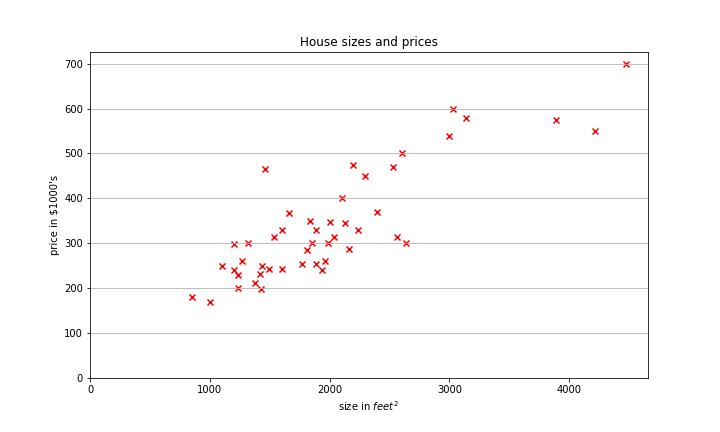

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(portland['Size'], 
            portland['Price'],
            marker='x', 
            color='red');
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.grid(axis='y')
plt.title('House sizes and prices')
plt.xlabel('size in ${feet}^2$')
plt.ylabel("price in $1000's")
 
plt.show()

In [5]:
X = np.array(portland[['Size']])
y = np.array(portland['Price'])

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
model.intercept_, model.coef_

(71.2704924487291, array([0.13452529]))

In [7]:
fitted = model.predict(X)

In [8]:
fitted

array([354.31169781, 286.5109528 , 394.13118298, 261.75829986,
       474.84635561, 338.30318857, 277.63228381, 263.23807803,
       256.9153895 , 272.2512723 , 332.24955063, 340.32106789,
       325.52328624, 673.67473086, 241.84855728, 380.67865421,
       248.84387224, 237.54374807, 422.24696811, 479.01663953,
       308.97667585, 325.25423566, 287.04905395, 335.20910696,
       594.57386168, 219.24830894, 267.40836194, 411.08136923,
       367.22612543, 426.01367617, 318.66249657, 205.79578017,
       345.7020794 , 493.27632003, 314.89578851, 264.5833309 ,
       237.94732393, 358.07840587, 638.29458019, 362.1141645 ,
       295.12057122, 372.33808637, 416.59690603, 232.70083771,
       185.88603759, 320.41132531, 233.10441358])

In [9]:
size_1250_predict = model.intercept_ + 1250 * model.coef_[0]
size_1250_predict

239.42710209903078

In [10]:
model.predict(np.array([1250]).reshape(1, 1))[0]

239.42710209903078

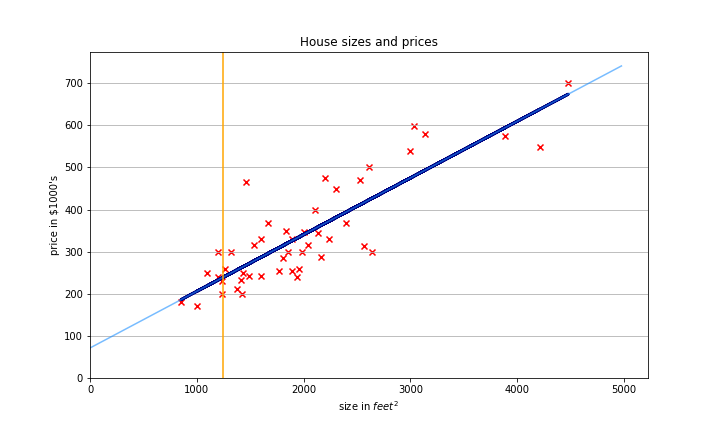

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X, 
            y,
            marker='x', 
            color='red');

# regression line - two ways
house_size = np.linspace(0, portland['Size'].max() + 500)
plt.plot(portland['Size'], fitted, color='navy', linewidth=3)
plt.plot(house_size, 
         model.intercept_ + house_size * model.coef_[0],
         color='dodgerblue', alpha=0.6)

# prediction for house of 1250 square feet
plt.axvline(1250, c='orange')

plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.grid(axis='y')
plt.title('House sizes and prices')
plt.xlabel('size in ${feet}^2$')
plt.ylabel("price in $1000's")
 
plt.show()

#### Terminology

- **Training set**: data that is used to train a model
- $x$ is the input variable, aka *feature*
- $y$ is the output variable, aka *target variable*
- $m$ is the total number of training examples (rows)
- $(x, y)$ denotes a single training example
- $(x^{(i)}, y^{(i)})$ denotes the $i^{th}$ training example
- $w$ is the **weight** parameter
- $b$ is the **bias** parameter
- $f_{w,b}\left(x^{(i)}\right)$ is the result of the model evaluation at $x^{(i)}$ parameterized by $w,b$
    - $f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b$
- $a$ is a scalar
- $\textbf{a}$ is a vector

In [12]:
m = len(portland)
m, portland.shape[0]

(47, 47)

In [13]:
x_i, y_i = portland['Size'][0], portland['Price'][0]
x_i, y_i

(2104, 399.9)

### 1.1.3.2 Linear regression model part 2

#### What does a supervised learning algorithm do with a dataset? 

- Input: training set
    - features
    - targets
- Output: function, $f$
    - historically, this function used to be called a **hypothesis**
    - the job of $f$ is to take a new input, $x$ and output an estimate or prediction for $\hat{y}$
    - $\hat{y}$ is the estimate or prediction for $y$
    - $y$ is the actual data value in the training set, aka the **target**
    - the function, $f$ is called the **model**


#### From the Portland housing example:

$\text{size} \implies f \implies \text{estimated price}$

#### How to represent $f$? 

- for now, we stick with $f$ being a straight line

$f_{w,b}\left(x\right) = wx + b$

- sometimes, $w,b$ is omitted, but it means the same thing
- the name if this model is **linear regression** or more specifically, **linear regression with one variable** or **univariate linear regression**
    - in the Portland example, that one variable is the single feature: the size of the house

### 1.1.3.3 Lab: Model representation

#### Goal

The goal of this lab is to learn to implement the model $f_{w,b}$ for linear regression with one variable.

#### The data and problem statement

This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \$300,000 and a house with 2000 square feet sold for \$500,000. These two points will constitute our data or **training set**. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

In [14]:
data = [[1.0, 300], [2.0, 500]]
train = pd.DataFrame(data, columns=['Size', 'Price'])
train

,Size,Price
0,1.0,300
1,2.0,500


In [15]:
x_train = np.array(train['Size'])
y_train = np.array(train['Price'])

In [16]:
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300 500]


#### Number of training examples: $m$

In [17]:
# m in the number of training examples
print(f'x_train.shape: {x_train.shape}')
m = x_train.shape[0]
print(f'The number of training examples is: {m}')

x_train.shape: (2,)
The number of training examples is: 2


In [18]:
# an alternate way to get m
m = len(x_train)
print(f'The number of training examples is: {m}')

The number of training examples is: 2


#### Training example: $x^{(i)}, y^{(i)}$

- Python is zero-index, so the first training example has index, $0$.

In [19]:
i = 0

x_i = x_train[i]
y_i = y_train[i]

print(f'(x^({i}), y^({i})) = ({x_i}, {y_i})')

(x^(0), y^(0)) = (1.0, 300)


#### Plotting the data

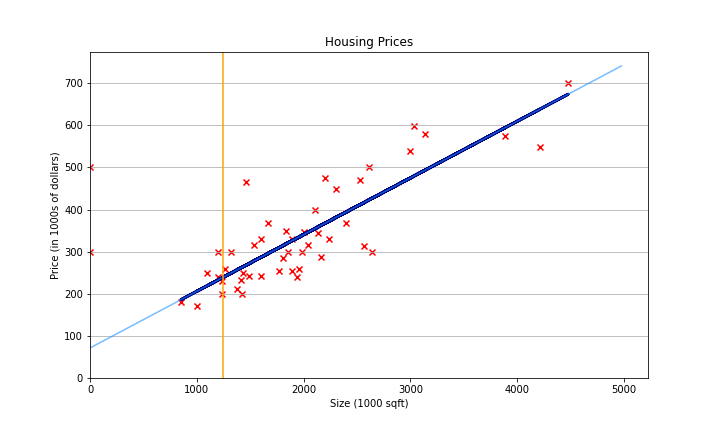

In [20]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Housing Prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.show()

#### Model, function $f$

The model function for linear regression is represented as:

$
f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b
$

Different values of $w$ and $b$ represent different straight lines on the plot.

In [21]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray(m,)): Data, m examples
      w,b (scalar).  : model parameters
    Returns
      y (ndarray(m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

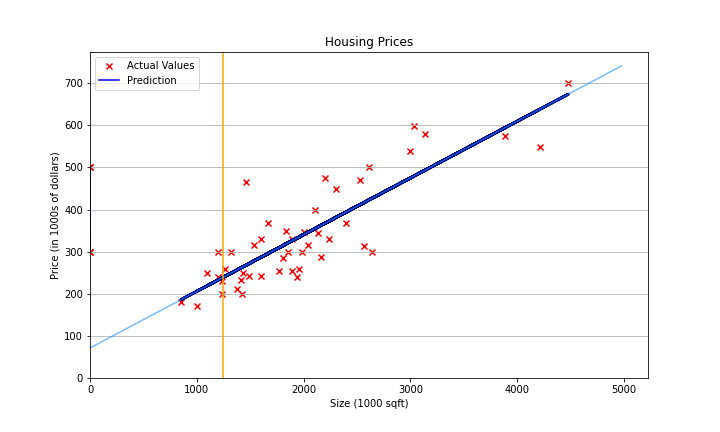

In [22]:
# w = 100; b = 100 # this is not a good estimate
w = 200; b = 100   # much better

# plot the data points
plt.scatter(x_train, y_train, marker='x', color='r', label='Actual Values')

# plot model prediction
temp_f_wb = compute_model_output(x_train, w, b)
plt.plot(x_train, temp_f_wb, c='b', label='Prediction')

plt.xlim(xmin=0)
plt.ylim(ymin=0)

# title, labels and legend
plt.title('Housing Prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.legend()

plt.show()

In our model, $w = 200$ and $b = 100$. Predict the cost of a house that is 1200 sqft. 

In [23]:
w = 200
b = 100
x_i = 1200 / 1000

cost_1200sqft = w * x_i + b

print(f'The cost of a 1200 sqft house is predicted to be {cost_1200sqft:.0f} thousand dollars')

The cost of a 1200 sqft house is predicted to be 340 thousand dollars


### 1.1.3.4 Cost function formula

- Training set: has features, $x$, and output targets, $y$
- Model: $f_{w,b}\left(x\right) = wx + b$
- Model parameters: $w$ and $b$
    - these parameters are also called: *coefficients* or *weights*
- $w,b$ determine the model, $f$, as shown in the following code:

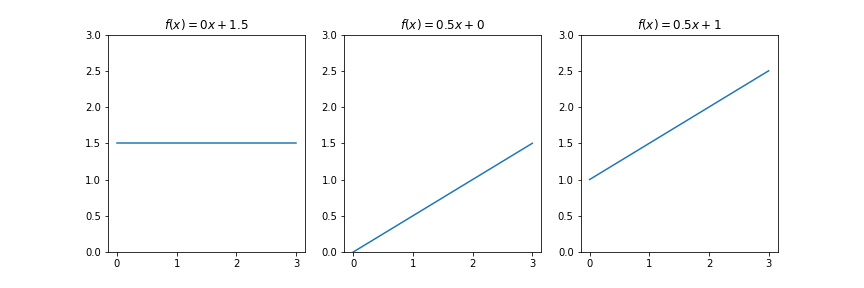

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

domain = np.array([0, 1, 2, 3])
f_wb = lambda w, b: w * domain + b

w = 0
b = 1.5
ax1.plot(domain, f_wb(w, b))
ax1.set_title('$f(x) = 0x + 1.5$')
ax1.set_ylim([0, 3])

w = 0.5
b = 0
ax2.plot(domain, f_wb(w, b))
ax2.set_title('$f(x) = 0.5x + 0$')
ax2.set_ylim([0, 3])

w = 0.5
b = 1
ax3.plot(domain, f_wb(w, b))
ax3.set_title('$f(x) = 0.5x + 1$')
ax3.set_ylim([0, 3])

plt.show()

- Recall that the $i^{th}$ training example is represented by $\left(x^{(i)}, y^{(i)}\right)$, where $y^{(i)}$ is the target
- For a given input, $x^{(i)}$, the function, $f$, also makes a predicted value, $\hat{y}^{(i)}$
    - $\hat{y}^{(i)} = f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b$
- **Goal**: find values $w$ and $b$ so that $\hat{y}^{(i)}$ is close to $y^{(i)}$ for all $\left(x^{(i)}, y^{(i)}\right)$ 

#### Measuring how well a line fits the training data

- To do this, we need a **cost function**
- The **error** for the $i^{th}$ data point is $\hat{y}^{(i)} - y^{(i)}$
- We want to square this error and measure it across the entire dataset


$$
\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^{2}
$$

- So that the cost function doesn't automatically get larger as the training set size gets larger, we take the average

$$
\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^{2}
$$

- However, by convention in the ML community, the division is by $2m$ instead of $m$
    - this cost function still works and it makes later calculations cleaner
- We use $J(w,b)$ to refer to the cost function
- This function is also called the **Squared Error Cost Function**
- In ML different cost functions are used for different applications, but this cost function is the most commonly used for linear regression, and all other regression problems


$$
\begin{align}
J(w,b) &= \frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^{2} \\ 
&= \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}
\end{align}
$$

- We have still not arrived at our goal of finding values for $w$ and $b$ that minimize the cost function, but we will get there after a lecture to build intuition about what it means if $J(w,b)$ is large vs small

### 1.1.3.5 Cost function intuition

#### Recap

- **model**: $f_{w,b}\left(x\right) = wx + b$
- **parameters**: $w, b$
- **cost function**: $J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}$
- **goal**: $\min_{w,b} J(w,b)$

#### Simplified Example: $b = 0$

- **model**: $f_{w,b}\left(x\right) = wx$
- **parameters**: $w$
- **cost function**: $J(w) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w}\left(x^{(i)}\right) - y^{(i)}\right)^{2}$
- **goal**: $\min_{w} J(w)$
- **$f$**: defines a line that goes through the origin

#### Another way to look at $J(w)$

- in the code example that follows this is represented by `J_alt` 
- in the graph this is shown as the silver parabola

$
\begin{align}
J(w) &= \frac{1}{2m}\sum_{i=1}^{m}\left(f_{w}\left(x^{(i)}\right) - y^{(i)}\right)^{2} \\
&= \frac{1}{2 \cdot 3}\sum_{i=1}^{3}\left(w \cdot x^{(i)} - y^{(i)}\right)^{2} \\
&= \frac{1}{6} \left(\left(w - 1\right)^{2} + \left(2w - 2\right)^{2} + \left(3w - 3\right)^{2}\right) \\
&= \frac{1}{6}\left(14w^{2} - 28w + 14\right)
\end{align}
$

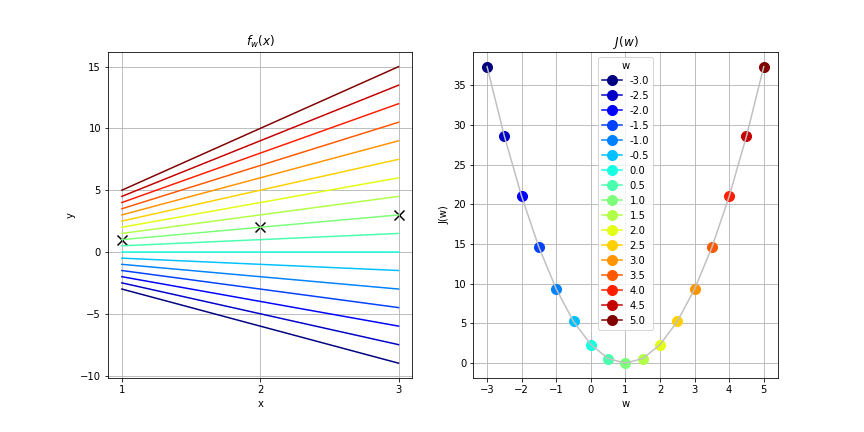

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_xticks([1, 2, 3])
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('$f_w(x)$')
ax2.grid()
ax2.set_xlabel('w')
ax2.set_ylabel('J(w)')
ax2.set_title('$J(w)$')

# training set
training_set = pd.DataFrame({'x' : [1, 2, 3], 'y' : [1, 2, 3]})

# plot training set
ax1.scatter(training_set['x'], training_set['y'], 
            marker='x', color='black', s=100)

# w takes on these values and colours
ws = np.arange(-3, 5.1, 0.5)
colors = plt.cm.jet(np.linspace(0, 1, len(ws)))

# model: w is variable
domain = np.array([1, 2, 3])
f = lambda w: w * domain

# cost function: w is variable
m = len(training_set)
J = lambda w: (1/(2*m)) * sum((f(w) - domain)**2)

# plot the model in ax1
# plot the value returned by the cost function in ax2
for i, w in enumerate(ws):
    ax1.plot(domain, f(w), color=colors[i])
    ax2.plot(w, J(w) , marker='.', markersize=20, color=colors[i], label=w)

J_domain = ws.reshape(len(ws), 1)
J_alt = lambda w: (1/6) * (14 * w**2 - 28 * w + 14)
ax2.plot(J_domain, J_alt(J_domain), color='silver')

plt.legend(title='w')
plt.show()

### 1.1.3.6 Visualizing the cost function

### 1.1.3.7 Visualization examples

### 1.1.3.8 Lab: Cost function



In [26]:
from ipywidgets import interact

#### Problem Statement

You would like a model which can predict housing prices given the size of the house.
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \$300,000 and a house with 2000 square feet sold for \$500,000.

In [27]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

#### Computing Cost

Don't confuse **cost** with the housing cost. The term **price** is used for that. Cost is a measure of how well our model is predicting the target price of the house.

The equation for cost with one variable is shown below. Note that we are summning from $i=0$ to $m-1$ since Python uses zero-based indexing.

$$
J(w,b) = \frac{1}{2m}\sum_{i=0}^{m - 1}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}
$$

where

$$
f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b
$$

In [28]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    
    # number of training examples
    m = x.shape[0]
    
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost

    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

# test the function
compute_cost(x_train, y_train, 200, 100)

0.0

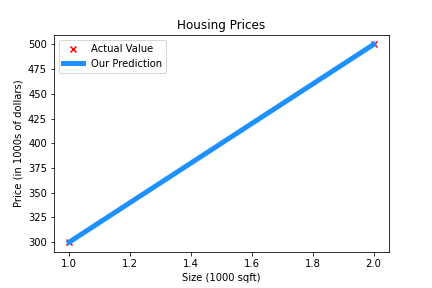

In [29]:
def plt_house_x(x, y, f_wb=None, ax=None):
    ''' plot house with axis'''

    if not ax:
        fig, ax = plt.subplots(1, 1)
    ax.scatter(x, y, marker='x', c='r', label='Actual Value')

    ax.set_title('Housing Prices')
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel('Size (1000 sqft)')
    if f_wb is not None:
        ax.plot(x, f_wb, c='dodgerblue', linewidth=5, label='Our Prediction')
    ax.legend()

# test the function
f_wb = np.dot(x_train, 200) + 100
plt_house_x(x_train, y_train, f_wb)

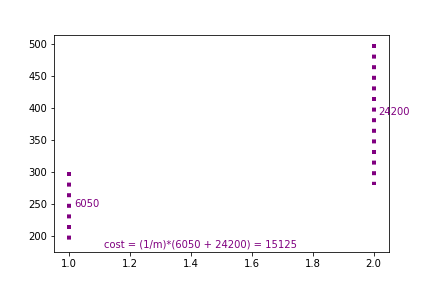

In [30]:
def mk_cost_lines(x, y, w, b, ax):
    ''' makes vertical cost lines '''
    cstr = 'cost = (1/m)*('
    ctot = 0
    label = 'cost for point'
    addedbreak = False
    
    for p in zip(x, y):
        # f_wb_p calculates the predicted values
        #   that are vertically aligned with the 
        #   actual values
        f_wb_p = w * p[0] + b
        # c_p is the cost for the point
        c_p = ((f_wb_p - p[1])**2) / 2
        
        
        # draws the cost lines (aka residual lines)
        ax.vlines(p[0], p[1], f_wb_p, 
                  lw=4, color='purple', ls='dotted', label=label)
        label = '' # prevents the legend from repeating the label
        cxy = [p[0], p[1] + (f_wb_p - p[1]) / 2]
        ax.annotate(f'{c_p:0.0f}', 
                    xy=cxy, 
                    xycoords='data', 
                    color='purple',
                    xytext=(5, 0),
                    textcoords='offset points')
        cstr += f'{c_p:0.0f} + '
        if len(cstr) > 38 and addedbreak is False:
            cstr += '\n'
            addedbreak = True 
        ctot += c_p
    
    ctot = ctot / len(x)
    cstr = cstr[:-3] + f') = {ctot:0.0f}'
    ax.text(0.15, 0.02, cstr, transform=ax.transAxes, color='purple')

# test the function
fig, ax = plt.subplots(1)
mk_cost_lines(x_train, y_train, 90, 100, ax)

#### Cost Function Intuition

In [31]:
def plt_intuition(x_train, y_train):

    w_range = np.array([0,400])
    tmp_b = 100

    w_array = np.arange(*w_range, 5)
    cost = np.zeros_like(w_array)

    for i, w in enumerate(w_array):
        cost[i] = compute_cost(x_train, y_train, w, tmp_b)
    
    @interact(w=(*w_range, 10), continuous_update=False)
    def func(w = 150):
        f_wb = np.dot(x_train, w) + tmp_b
    
        fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8, 4))

        mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])
        plt_house_x(x_train, y_train, f_wb = f_wb, ax=ax[0])
        
        ax[1].plot(w_array, cost, c='dodgerblue', linewidth=5)
        cur_cost = compute_cost(x_train, y_train, w, tmp_b)
        ax[1].scatter(w, cur_cost, s=100, color='red', zorder=10, 
                      label=f'cost at w={w}')
        ax[1].hlines(cur_cost, ax[1].get_xlim()[0], 
                     w, lw=4, color='purple', ls='dotted')
        ax[1].vlines(w, ax[1].get_ylim()[0], cur_cost, 
                     lw=4, color='purple', ls='dotted')
        ax[1].set_title("Cost vs. w, (b fixed at 100)")
        ax[1].set_ylabel('Cost')
        ax[1].set_xlabel('w')
        ax[1].legend(loc='upper center')

        fig.suptitle(f'Minimize Cost: Current Cost = {cur_cost:0.0f}', 
                     fontsize=12)

        plt.show()

In [32]:
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

Notes about the above plot:

- We already know from the previous lab that the cost is minimized when $b = 100$, so $b$ remains constant at that value
- Cost is minimized when $w = 200$
- Because the difference between the target and prediction is squared in the cost equation, the cost increases rapidly when $w$ gets too large or too small


#### Cost Fuction Visualization: 3D

- here we use a larger data set
- we also use data points that don't all fall on a line (the minimum value of the cost function will never be 0)


In [33]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

In [34]:
def plt_stationary(x_train, y_train):
    # setup figure
    fig = plt.figure(figsize=(12, 12))
    fig.set_facecolor('white')
    fig.canvas.toolbar_position = 'top'

    gs = GridSpec(2, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, :], projection='3d')
    ax = np.array([ax0, ax1, ax2])

    # setup useful ranges and common linspaces
    b_range = np.array([50 - 300., 50 + 300]) 
    w_range = np.array([200 - 300., 200 + 300])
    b_space = np.linspace(*b_range, 200)
    w_space = np.linspace(*w_range, 100)

    # get cost for w, b, ranges for countour and 3D
    tmp_b, tmp_w = np.meshgrid(b_space, w_space)
    z = np.zeros_like(tmp_b)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]): 
            z[i,j] = compute_cost(x_train, 
                                  y_train, 
                                  tmp_w[i][j], 
                                  tmp_b[i][j])
            if z[i, j] == 0: z[i, j] = 1e-6

    # initial point
    w0 = 200; b = -100

    # plot model with cost
    f_wb = np.dot(x_train, w0) + b
    mk_cost_lines(x_train, y_train, w0, b, ax[0])
    plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

    # plot contour
    ax[1].contour(tmp_w, tmp_b, np.log(z), levels=50, cmap='Greens')
    ax[1].set_title('Cost(w, b)')
    ax[1].set_xlabel('w', fontsize=10)
    ax[1].set_ylabel('b', fontsize=10)
    ax[1].set_xlim(w_range)
    ax[1].set_ylim(b_range)
    cscat = ax[1].scatter(w0, b, s=100, c='dodgerblue',
                          zorder=10, label='cost with \ncurrent w,b')
    chline = ax[1].hlines(b, ax[1].get_xlim()[0], w0,
                          color='purple', lw=4, ls='dotted')
    cvline = ax[1].vlines(w0, ax[1].get_ylim()[0], b, 
                          color='purple', lw=4, ls='dotted')
    ax[1].text(0.5, 0.95, 'Click to choose w,b',
               bbox=dict(facecolor='white', ec='lightgray'), 
               fontsize=10, 
               verticalalignment='center', 
               horizontalalignment='center',
               transform=ax[1].transAxes)
    ax[1].legend(loc='upper left')
  
    # surface plot of J(w,b)
    ax[2].plot_surface(tmp_w, tmp_b, z, cmap='Greens', alpha=0.8,
                       antialiased=True)
    ax[2].plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
    ax[2].set_xlabel('$w$')
    ax[2].set_ylabel('$b$')
    ax[2].zaxis.set_rotate_label(False)
    ax[2].xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].set_zlabel('J(w,b)\n\n', rotation=90)
    ax[2].set_title('J(w,b) \n [You can rotate this figure]', size=12)
    ax[2].view_init(30, -120)

    return fig, ax, [cscat, chline, cvline]

In [35]:
class plt_update_onclick:
    def __init__(self, fig, ax, x_train, y_train, dyn_items):
        self.fig = fig
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train
        self.dyn_items = dyn_items
        self.cid = fig.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        if event.inaxes == self.ax[1]:
            ws = event.xdata
            bs = event.ydata
            cst = compute_cost(self.x_train, self.y_train, ws, bs)

            # clear and redraw line plot
            self.ax[0].clear()
            f_wb = np.dot(self.x_train, ws) + bs 
            mk_cost_lines(self.x_train, self.y_train, ws, bs, self.ax[0])
            plt_house_x(self.x_train, self.y_train, f_wb=f_wb, ax=self.ax[0])

            # remove lines and re-add on contour plot and 3d plot
            for artist in self.dyn_items:
                artist.remove()

            a = self.ax[1].scatter(ws, bs, s=100, c='dodgerblue',
                                   zorder=10, label='cost with \ncurrent w,b')
            b = self.ax[1].hlines(bs, ax[1].get_xlim()[0], ws,
                                  color='purple', lw=4, ls='dotted')
            c = self.ax[1].vlines(ws, ax[1].get_ylim()[0], bs, 
                                  color='purple', lw=4, ls='dotted')
            d = self.ax[1].annotate(f"Cost: {cst:.0f}", 
                                    xy=(ws, bs),
                                    xytext=(4,4), 
                                    textcoords = 'offset points',
                                    bbox=dict(facecolor='white'), 
                                    size = 10)
            # add a point in 3D surface plot
            e = self.ax[2].scatter3D(ws, bs, cst, marker='X', s=100, 
                                     c='red')
    
            self.dyn_items = [a, b, c, d, e]
            self.fig.canvas.draw()

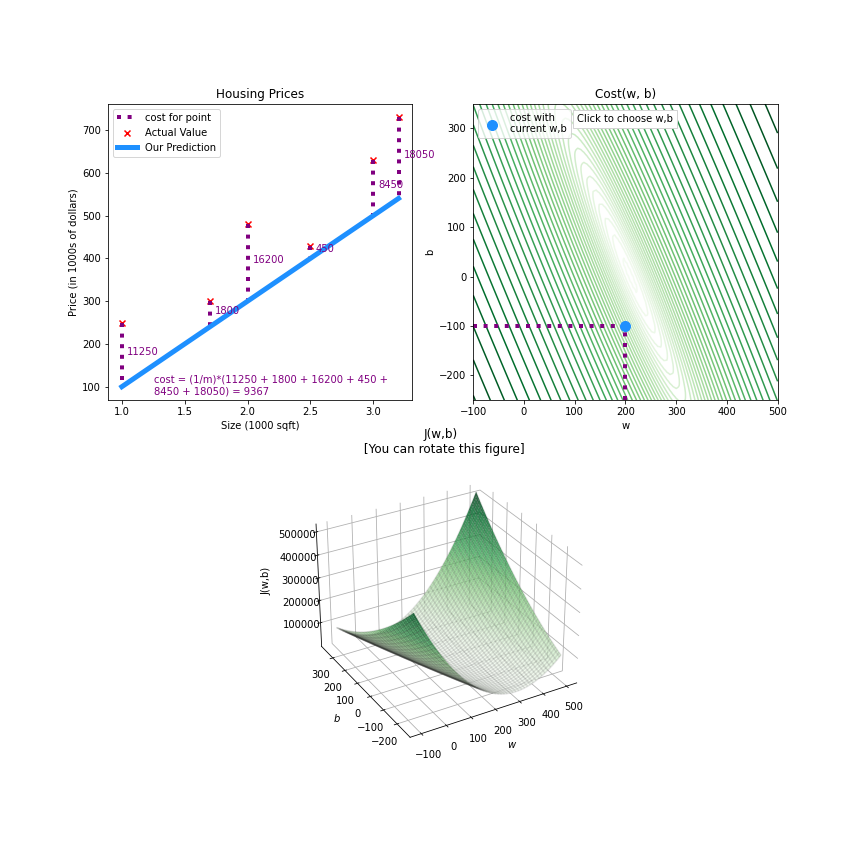

In [36]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

#### Convex Cost surface

- Because the cost function squares the loss, the "error surface" is convex
- It will always have a minimum that can be reached

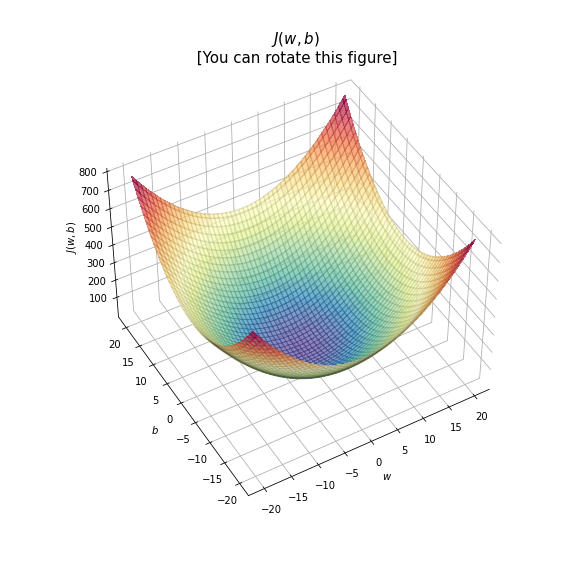

In [37]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))   
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
ax.set_zlabel('$J(w,b)$', rotation=90)
ax.set_title("$J(w,b)$\n [You can rotate this figure]", size=15)

ax.view_init(45, -120)

w = np.linspace(-20, 20, 100)
b = np.linspace(-20, 20, 100)
z = lambda x, y: x**2 + y**2

W, B = np.meshgrid(w, b)
J = z(W, B)

ax.plot_surface(W, B, J, 
                cmap='Spectral_r', 
                alpha=0.7, 
                antialiased=False)
ax.plot_wireframe(W, B, J, color='k', alpha=0.1)

plt.show()